# Import

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install matplotlib

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold

In [4]:
data = pd.read_csv (r'C:\Users\bego_\Desktop\ML_project\src\data\Salary.csv')
# Fuente: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country

# Descripción de data

In [11]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0


In [6]:
data.keys()

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

In [7]:
data.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [8]:
data.dtypes

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object

In [9]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

In [10]:
print("Filas:", data.shape[0])
print("Columnas:", data.shape[1])

Filas: 6684
Columnas: 9


# Limpiar los datos

In [11]:
# Comprobar duplicados
duplicados = data[data.duplicated(keep=False)]

if duplicados.empty:
    print("No hay filas duplicadas")
else:
    print("Filas duplicadas:")
    print(duplicados)


Filas duplicadas:
       Age  Gender  Education Level                       Job Title  \
168   31.0  Female                1                  HR Coordinator   
211   28.0    Male                1  Business Development Associate   
252   28.0    Male                1  Business Development Associate   
281   29.0  Female                1  Business Development Associate   
284   33.0    Male                1                Business Analyst   
...    ...     ...              ...                             ...   
6663  51.0  Female                2       Content Marketing Manager   
6664  37.0    Male                1                  Sales Director   
6672  24.0    Male                1                 Sales Executive   
6677  51.0  Female                2       Product Marketing Manager   
6683  26.0  Female                0                 Sales Executive   

      Years of Experience    Salary    Country     Race  Senior  
168                   4.0   50000.0      China   Korean       0

In [12]:
# Verificar duplicados basados en el índice
duplicados_index = data.index[data.index.duplicated(keep=False)]

if len(duplicados_index) == 0:
    print("No hay índices duplicados")
else:
    print("Índices duplicados en el DataFrame:")
    print(duplicados_index)
    print("\nFilas duplicadas en el DataFrame:")
    print(data[data.index.duplicated(keep=False)])

No hay índices duplicados


### Feature engineering

- Job title: string a numérico (en base a salario)

In [13]:
data['Job Title'].nunique()

129

In [5]:
# Ordenar el DataFrame por la columna 'Salary' de menor a mayor
data = data.sort_values(by='Salary')

# Crear un diccionario para asignar valores numéricos a cada 'Job Title' basado en el salario
jobtitle_salary_mapping = {title: idx for idx, title in enumerate(data['Job Title'].unique(), start=1)}

# Mapear los títulos de trabajo al valor numérico basado en el salario
data['Job Title Numeric'] = data['Job Title'].map(jobtitle_salary_mapping)

In [6]:
# Crear un diccionario para asignar valores numéricos a cada 'Job Title' basado en el salario
jobtitle_salary_mapping = {title: idx for idx, title in enumerate(data['Job Title'].unique(), start=1)}

# Mostrar cada valor único de 'Job Title' con su valor numérico correspondiente
unique_job_titles = data['Job Title'].unique()

for title in unique_job_titles:
    job_numeric = jobtitle_salary_mapping[title]
    print(f"{title}: {job_numeric}")


Business Operations Analyst: 1
HR Coordinator: 2
Front end Developer: 3
Software Engineer Manager: 4
Sales Associate: 5
Receptionist: 6
Sales Representative: 7
Delivery Driver: 8
Digital Marketing Manager: 9
Customer Service Representative: 10
HR Generalist: 11
Juniour HR Coordinator: 12
Sales Executive: 13
Software Developer: 14
Web Developer: 15
Accountant: 16
Marketing Analyst: 17
Sales Manager: 18
Help Desk Analyst: 19
Business Development Associate: 20
Operations Analyst: 21
Data Entry Clerk: 22
Customer Support Specialist: 23
Operations Manager: 24
Software Engineer: 25
Business Analyst: 26
Developer: 27
Marketing Coordinator: 28
Customer Success Rep: 29
Marketing Specialist: 30
Copywriter: 31
Project Manager: 32
Financial Analyst: 33
Technical Support Specialist: 34
Operations Coordinator: 35
Designer: 36
Customer Service Rep: 37
Customer Success Manager: 38
Product Manager: 39
Juniour HR Generalist: 40
Graphic Designer: 41
Account Manager: 42
Data Scientist: 43
Event Coordinato

- Country: string a numérico (en base a salario)

In [16]:
data['Country'].unique()

array(['USA', 'UK', 'Canada', 'China', 'Australia'], dtype=object)

In [7]:
# Ordenar el DataFrame por la columna 'Salary' de menor a mayor manteniendo el orden de 'Country'
data = data.sort_values(by='Salary')

# Crear un diccionario para asignar valores numéricos a cada 'Country' basado en el salario
country_salary_mapping = {country: idx for idx, country in enumerate(data['Country'].unique(), start=1)}

# Mapear los países al valor numérico basado en el salario
data['Country Numeric'] = data['Country'].map(country_salary_mapping)


In [18]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Job Title Numeric,Country Numeric
258,29.0,Male,1,Business Operations Analyst,1.5,350.0,USA,Hispanic,0,1,1
4615,31.0,Female,1,HR Coordinator,4.0,500.0,USA,Asian,0,2,1
1888,25.0,Female,1,Front end Developer,1.0,550.0,UK,Mixed,0,3,2
2640,23.0,Male,3,Software Engineer Manager,1.0,579.0,UK,Mixed,0,4,2
6207,24.0,Female,0,Receptionist,0.0,25000.0,Australia,White,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...
4258,51.0,Male,3,Data Scientist,24.0,240000.0,Canada,Black,0,43,4
4363,51.0,Male,3,Data Scientist,24.0,240000.0,Canada,Asian,0,43,4
83,52.0,Male,3,Chief Technology Officer,24.0,250000.0,Canada,Black,0,128,4
4983,45.0,Male,1,Financial Manager,21.0,250000.0,Canada,Black,0,51,4


- Race: string a numérico (no ordinales)

In [19]:
data['Race'].unique()

array(['Hispanic', 'Asian', 'Mixed', 'White', 'Black', 'Australian',
       'Korean', 'Chinese', 'Welsh', 'African American'], dtype=object)

In [8]:
# Convertir valores string de la columna 'Race' a valores numéricos
race_numeric, _ = data['Race'].factorize()

# Añadir la nueva columna 'Race Numeric' (números empezando desde 1)
data['Race Numeric'] = race_numeric + 1  # Sumar 1 para iniciar los números desde 1

# Actualizar el DataFrame original 'data' con la nueva columna 'Race Numeric'
data['Race Numeric'] = data['Race Numeric']

- Gender: string a binary

In [9]:
# Mapear las string "Gender" a valores numéricos
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


In [10]:
data_numeric = data[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]

In [23]:
data_numeric

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Job Title Numeric,Country Numeric,Race Numeric
258,29.0,0,1,1.5,350.0,0,1,1,1
4615,31.0,1,1,4.0,500.0,0,2,1,2
1888,25.0,1,1,1.0,550.0,0,3,2,3
2640,23.0,0,3,1.0,579.0,0,4,2,3
6207,24.0,1,0,0.0,25000.0,0,6,3,4
...,...,...,...,...,...,...,...,...,...
4258,51.0,0,3,24.0,240000.0,0,43,4,5
4363,51.0,0,3,24.0,240000.0,0,43,4,2
83,52.0,0,3,24.0,250000.0,0,128,4,5
4983,45.0,0,1,21.0,250000.0,0,51,4,5


# EDA

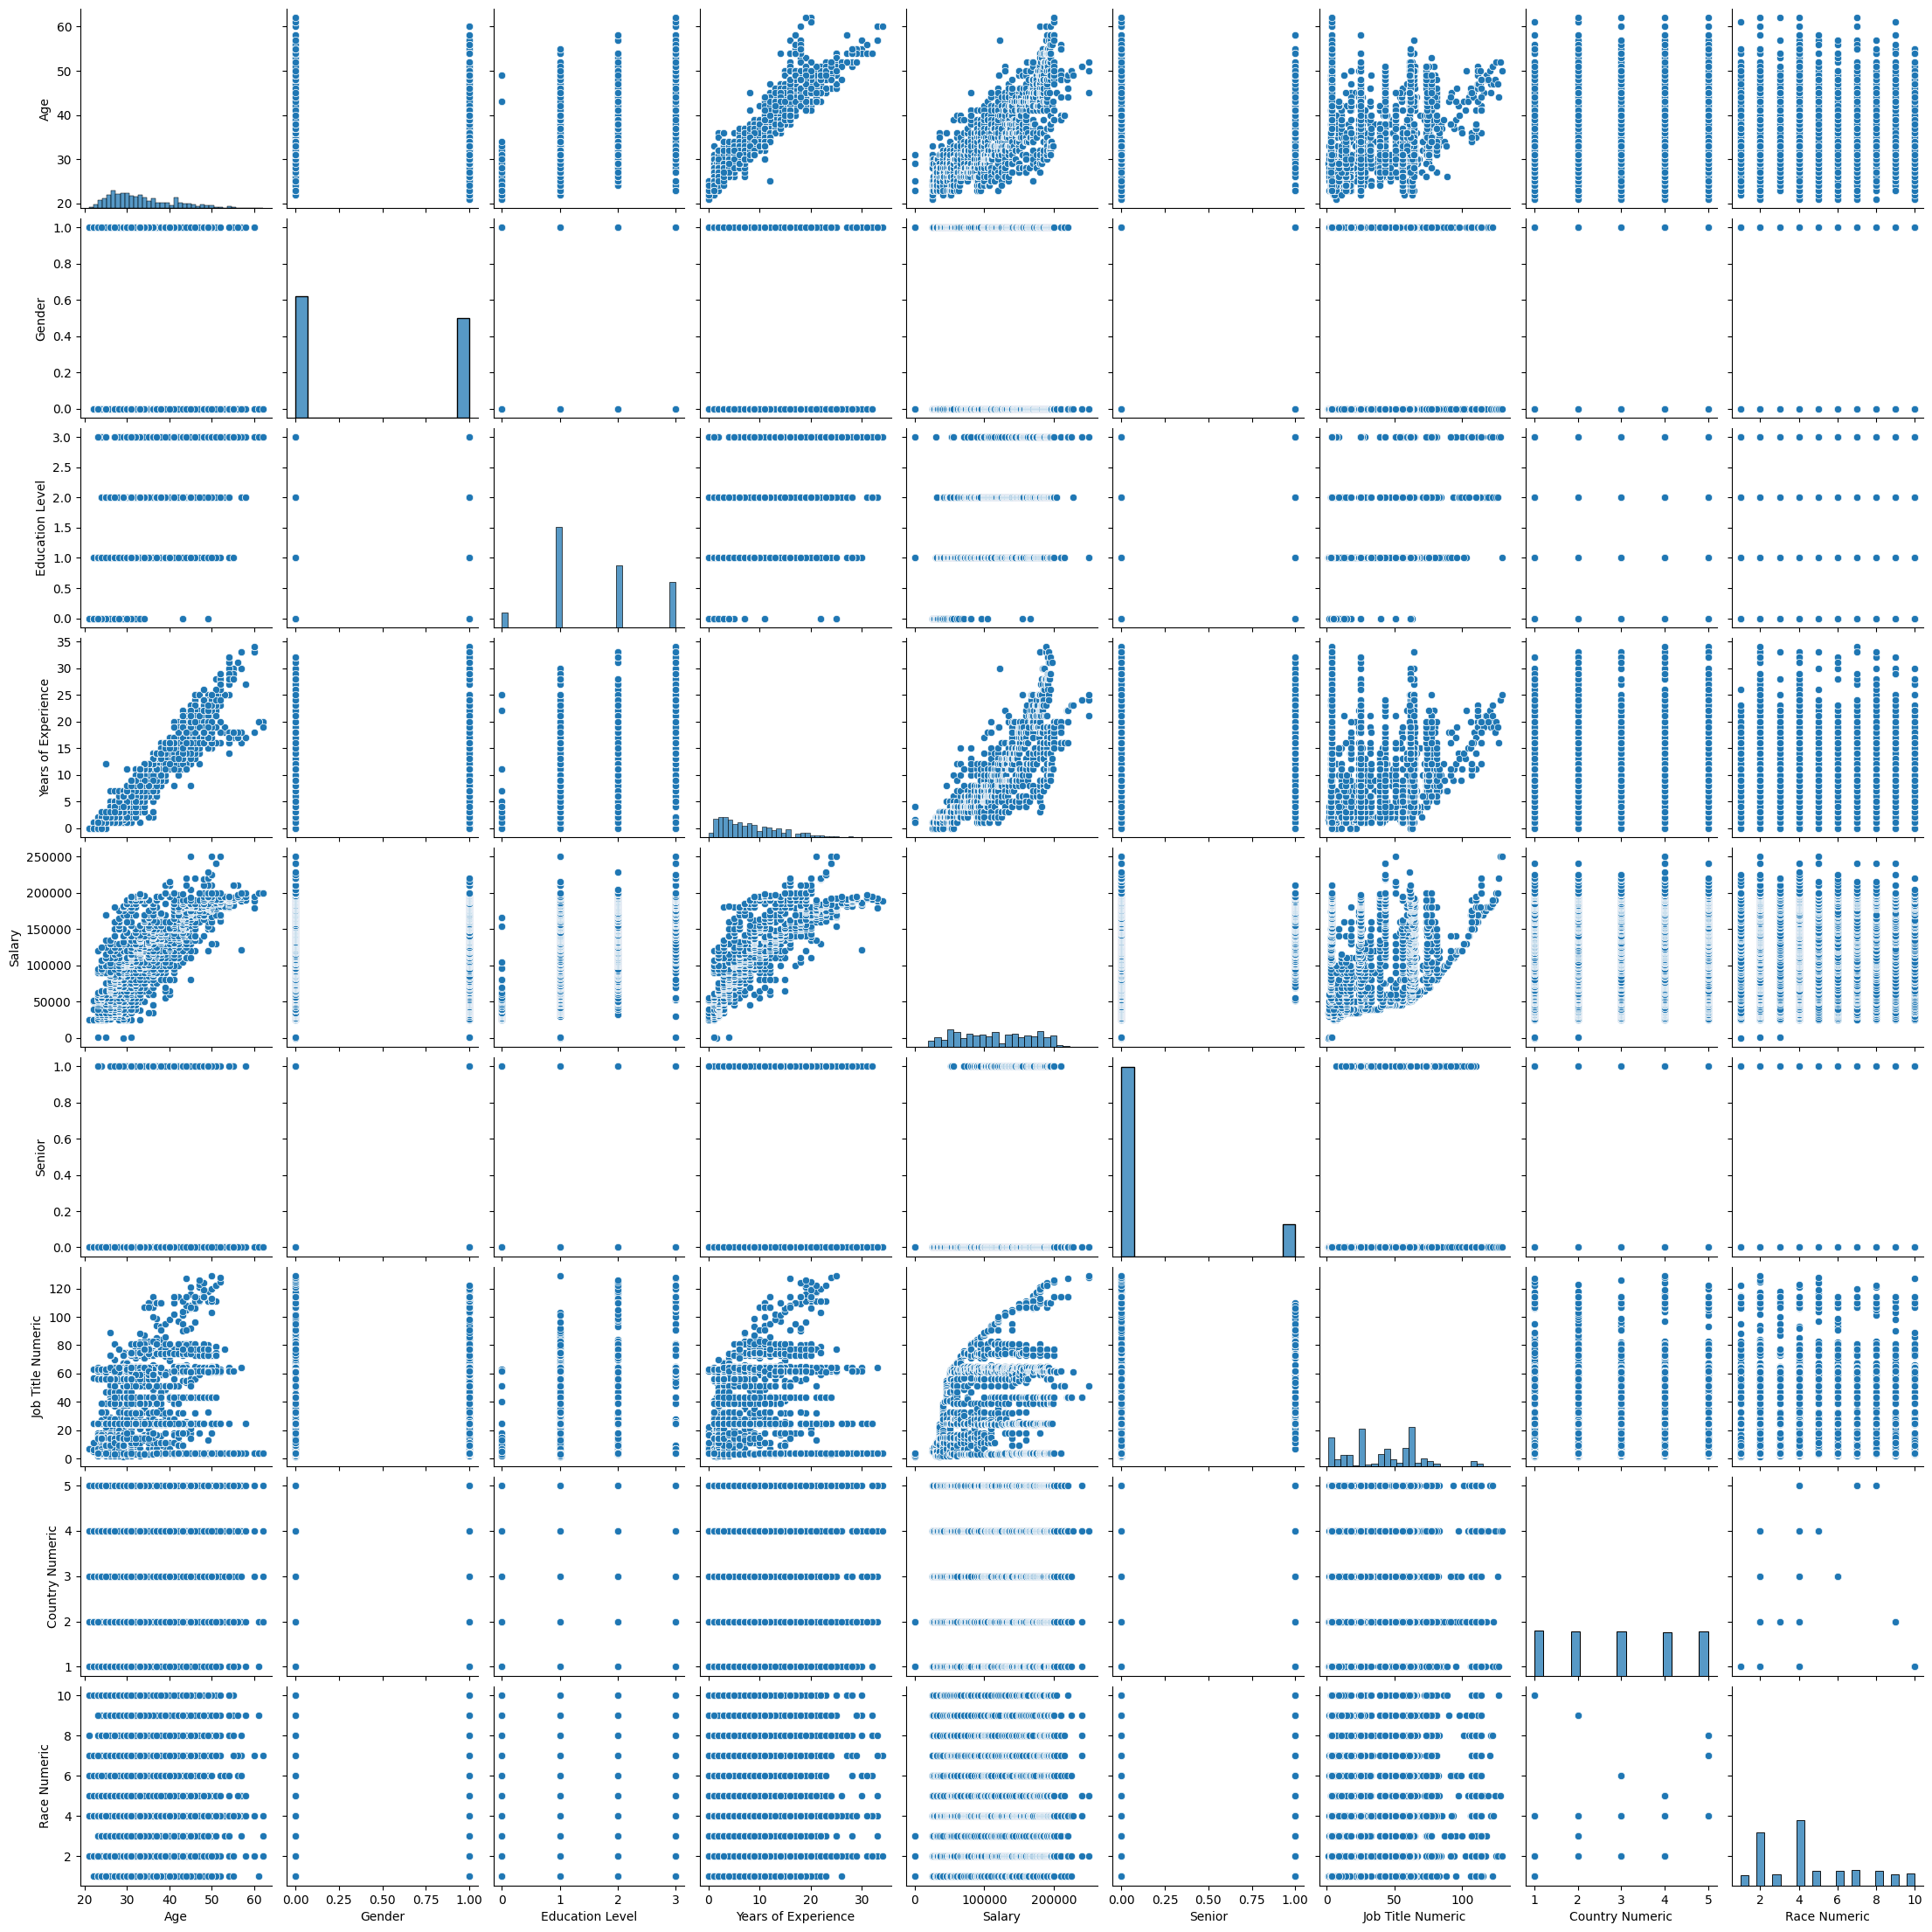

In [24]:
sns.pairplot(data)

### **Salary**

In [25]:
data_numeric['Salary'].describe()

count      6684.000000
mean     115307.175194
std       52806.810881
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

- Media: Es el promedio de los salarios.

- Mediana: Representa el valor central de la distribución de salarios.

- Desviación estándar: Mide la dispersión de los salarios con respecto a la media.

- Mínimo y máximo: Indican el rango de valores de los salarios.

- Cuartiles (especialmente el primer y tercer cuartil): Proporcionan información sobre la dispersión de los datos.

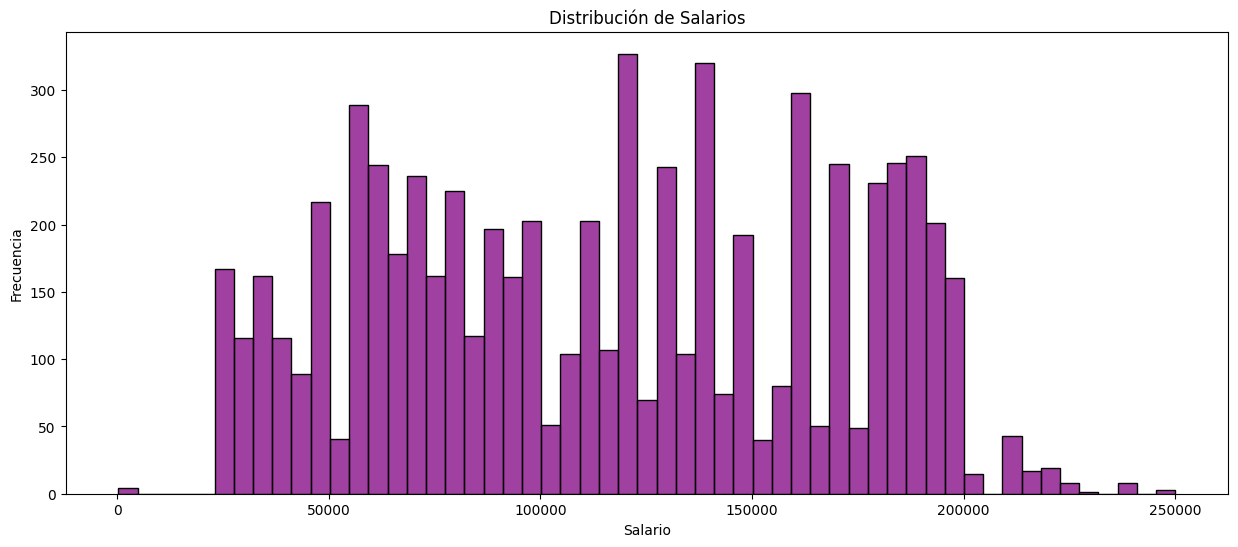

In [26]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data_numeric, x='Salary', bins=55, color='purple')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de Salarios')
plt.show()



## EDA: Variables

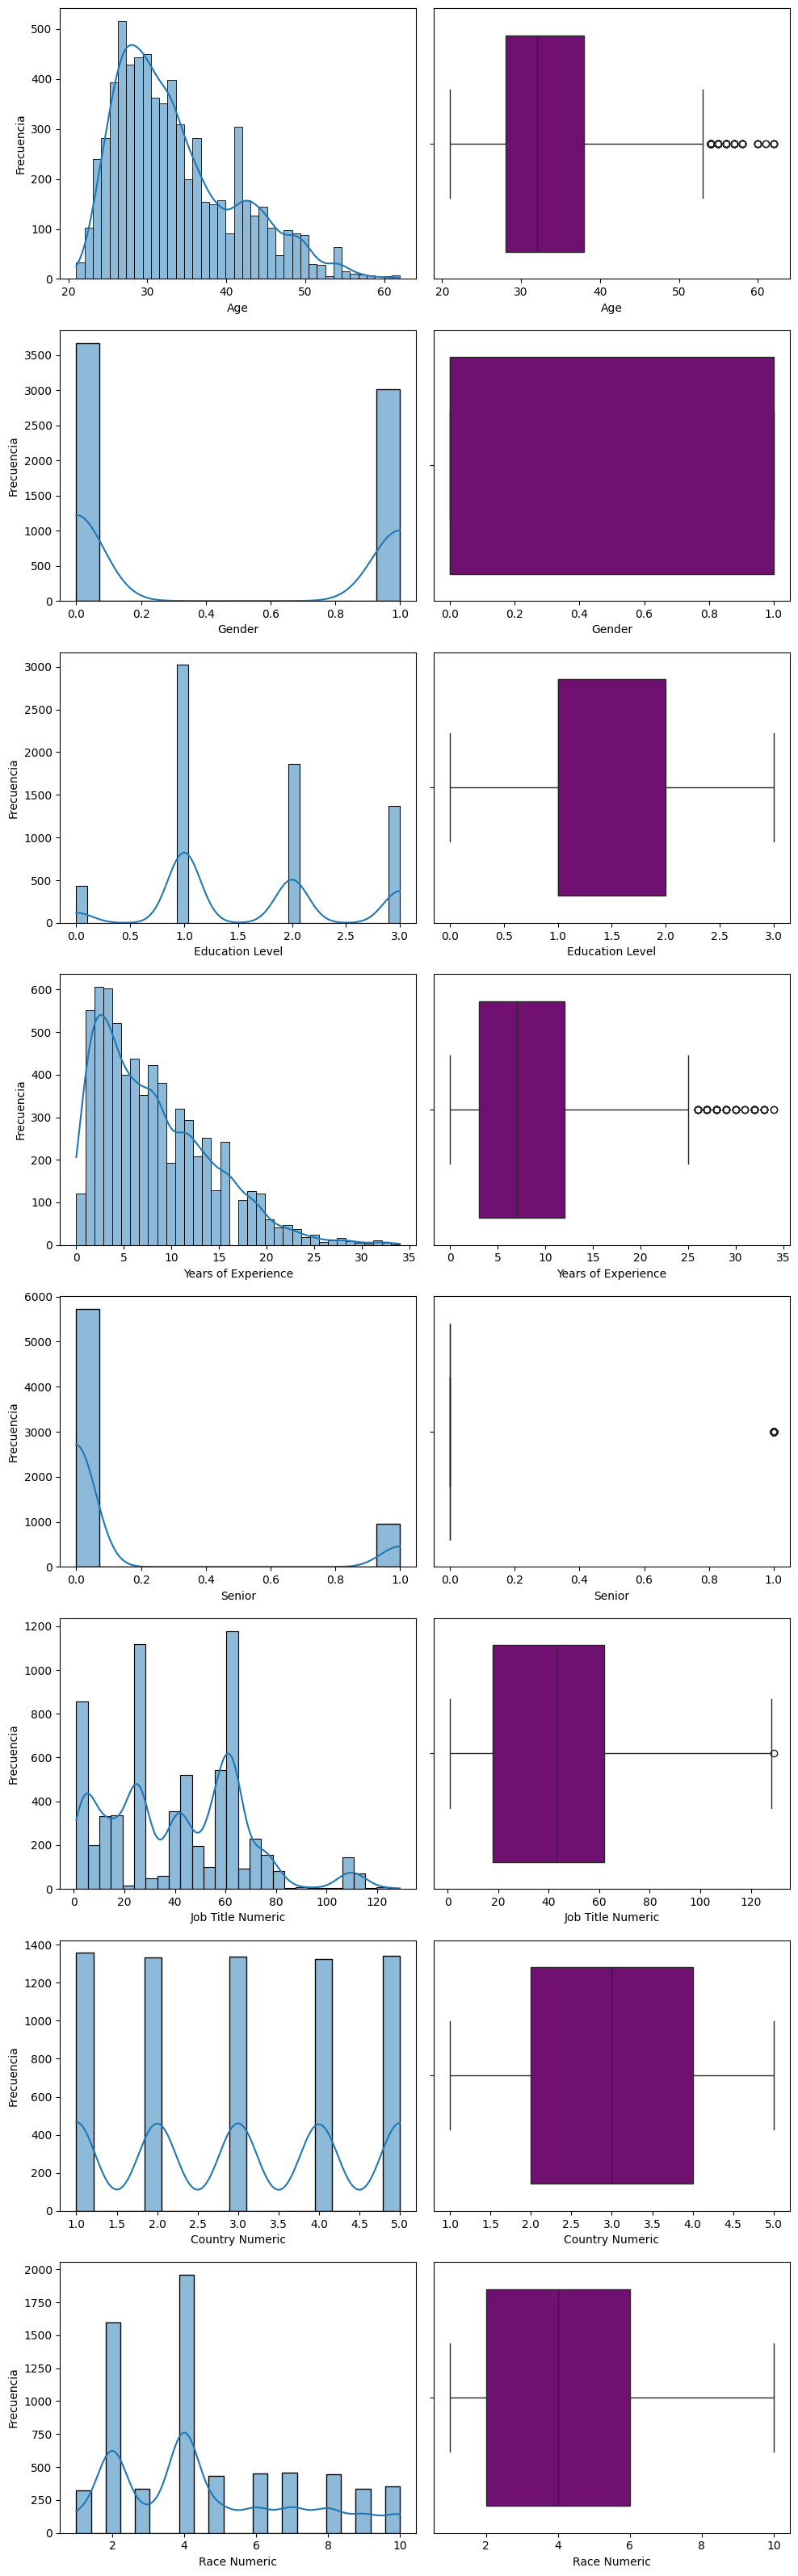

In [27]:
columns_to_visualize = data_numeric.columns[data_numeric.columns != 'Salary']

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=2, figsize=(10, 4 * len(columns_to_visualize)))
for i, col in enumerate(columns_to_visualize):
    # Histograma
    sns.histplot(data_numeric[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')
    
    # Diagrama de caja
    sns.boxplot(x=data_numeric[col], ax=axes[i, 1], color='purple')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('')
    
plt.tight_layout()
plt.show()


Histogramas y diagramas de caja. Distribución de cada variable y valores atípicos.

### Age

#### Distribución por edades

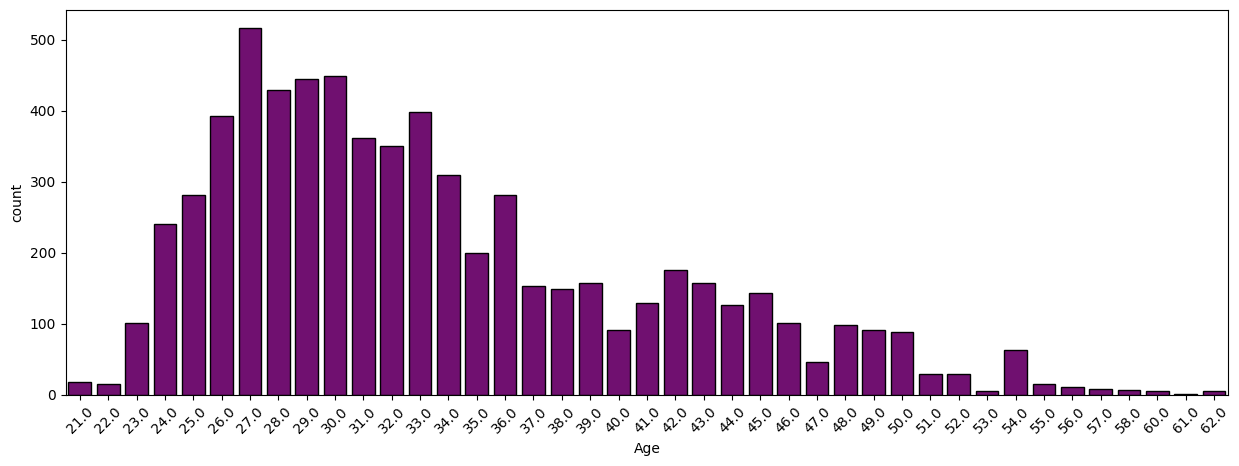

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(x=data_numeric["Age"], color='purple', edgecolor='black')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 21 - 30  
# 31- 40
# 41 - 50
# 51 - 62

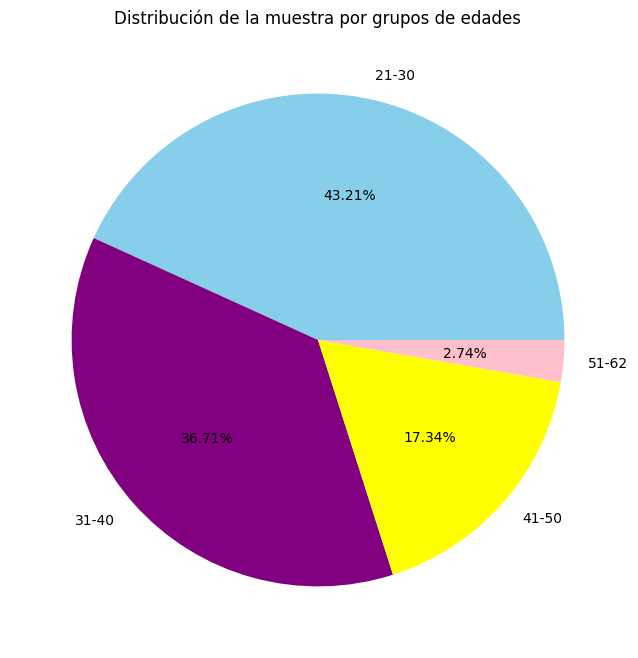

In [30]:
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 62], labels=['21-30', '31-40', '41-50', '51-62'])
edad_grupos = data['Age_Group'].value_counts()

# Colores personalizados
custom_colors = ['skyblue', 'purple', 'yellow', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(edad_grupos.values, labels=edad_grupos.index, autopct='%1.2f%%', colors=custom_colors)
plt.title('Distribución de la muestra por grupos de edades')
plt.show()


### Género

#### Proporción en dataset

In [31]:
# Male = 0
# Female = 1

C:\Users\bego_\AppData\Local\Temp\ipykernel_15888\873908698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Gender", palette=['skyblue', 'purple'])


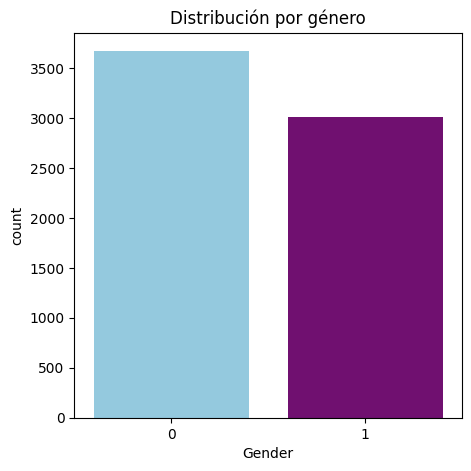

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.countplot(data=data, x="Gender", palette=['skyblue', 'purple']) 
plt.title("Distribución por género")
plt.show()


In [33]:
data_numeric

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Job Title Numeric,Country Numeric,Race Numeric
258,29.0,0,1,1.5,350.0,0,1,1,1
4615,31.0,1,1,4.0,500.0,0,2,1,2
1888,25.0,1,1,1.0,550.0,0,3,2,3
2640,23.0,0,3,1.0,579.0,0,4,2,3
6207,24.0,1,0,0.0,25000.0,0,6,3,4
...,...,...,...,...,...,...,...,...,...
4258,51.0,0,3,24.0,240000.0,0,43,4,5
4363,51.0,0,3,24.0,240000.0,0,43,4,2
83,52.0,0,3,24.0,250000.0,0,128,4,5
4983,45.0,0,1,21.0,250000.0,0,51,4,5


### Education level

C:\Users\bego_\AppData\Local\Temp\ipykernel_15888\1864279508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_numeric["Education Level"], palette=custom_palette)


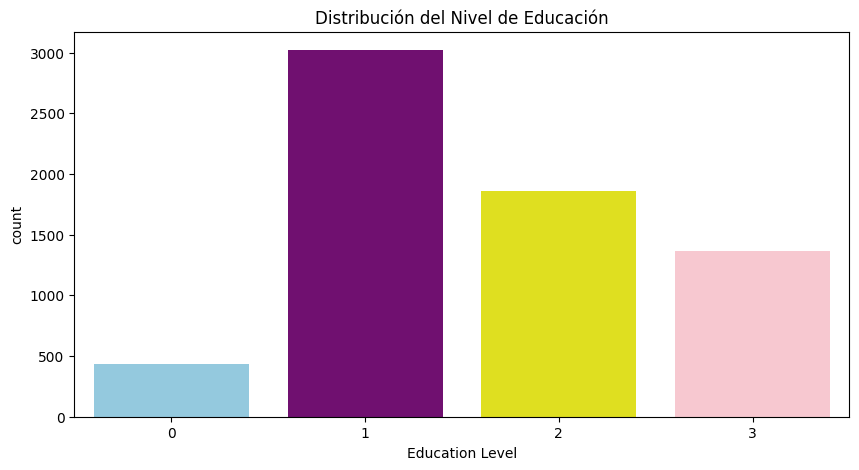

In [34]:
custom_palette = ["skyblue", "purple", "yellow", "pink"]

plt.figure(figsize=(10, 5))
sns.countplot(x=data_numeric["Education Level"], palette=custom_palette)
plt.title("Distribución del Nivel de Educación")
plt.show()


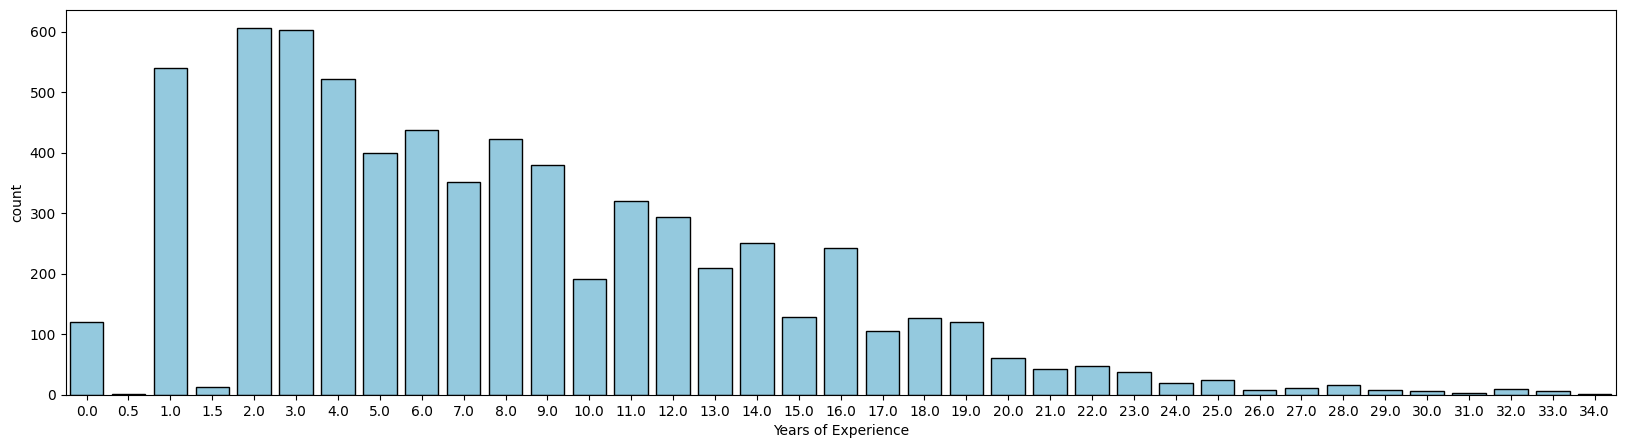

In [35]:
plt.figure(figsize=(20, 5))
sns.countplot(x=data_numeric["Years of Experience"], color='skyblue', edgecolor='black')
plt.xticks
plt.show()

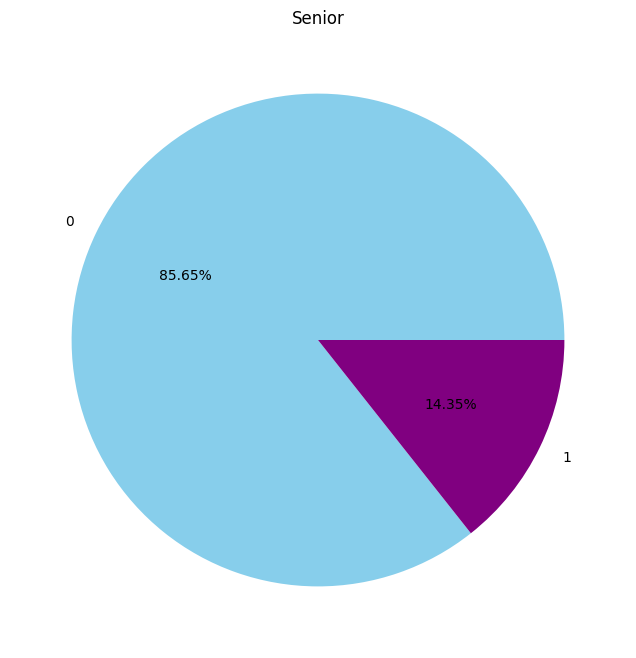

In [36]:
import matplotlib.pyplot as plt

# Valores y etiquetas para el gráfico de pastel
gender = data_numeric['Senior'].value_counts()

# Colores personalizados
custom_colors = ['skyblue', 'purple']

plt.figure(figsize=(8, 8))
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%', colors=custom_colors)
plt.title('Senior')
plt.show()


#### **Salario vs. variables**

### Nivel educativo vs salario

C:\Users\bego_\AppData\Local\Temp\ipykernel_15888\3477393652.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education Level', y='Salary', data=data_numeric, ci=None)


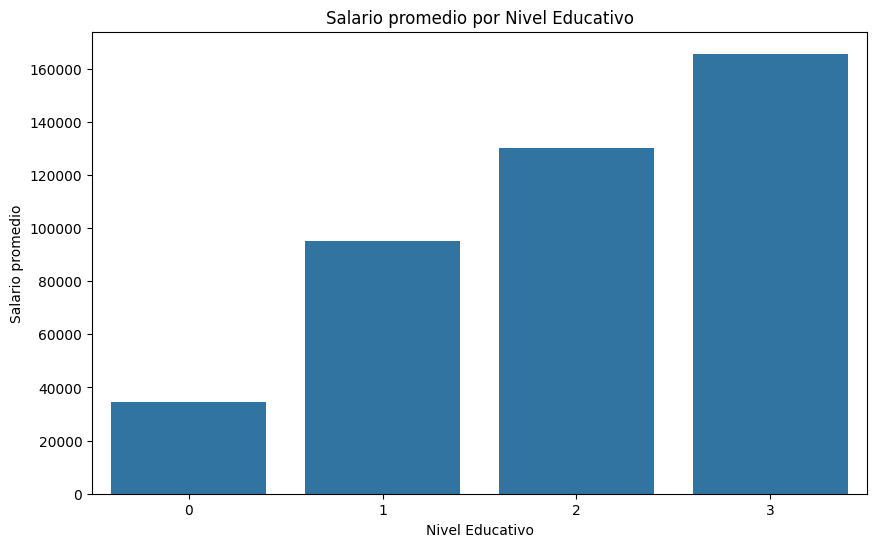

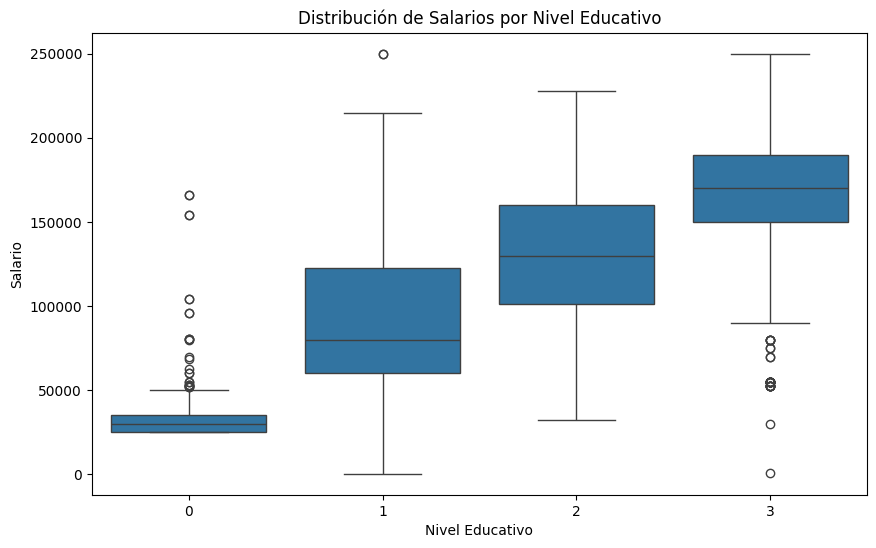

Estadísticas resumidas para 'Education Level' y 'Salary':
                          mean    median  count
Education Level                                
0                 34415.612385   30000.0    436
1                 95082.908640   80000.0   3021
2                130078.384822  130000.0   1858
3                165651.457999  170000.0   1369


In [37]:
plt.figure(figsize=(10, 6))

# Gráfico de barras de salario promedio por nivel educativo
sns.barplot(x='Education Level', y='Salary', data=data_numeric, ci=None)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por Nivel Educativo')
plt.show()

# Boxplot para ver la distribución de salarios por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=data_numeric)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.title('Distribución de Salarios por Nivel Educativo')
plt.show()

# Estadísticas resumidas
summary_stats_education = data_numeric.groupby('Education Level')['Salary'].agg(['mean', 'median', 'count'])
print("Estadísticas resumidas para 'Education Level' y 'Salary':")
print(summary_stats_education)


# Cor matrix

In [38]:
data_numeric.corr()

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Job Title Numeric,Country Numeric,Race Numeric
Age,1.000000,-0.117401,0.596380,0.937609,0.728343,0.334070,0.211694,0.021604,0.014920
Gender,-0.117401,1.000000,-0.022621,-0.098809,-0.127276,-0.038852,0.022368,-0.012549,0.009676
Education Level,0.596380,-0.022621,1.000000,0.613165,0.645444,0.273466,0.349429,0.004961,-0.003037
Years of Experience,0.937609,-0.098809,0.613165,1.000000,0.810942,0.317877,0.286991,0.017573,0.008174
Salary,0.728343,-0.127276,0.645444,0.810942,1.000000,0.223636,0.348167,0.019135,-0.011958
Senior,0.334070,-0.038852,0.273466,0.317877,0.223636,1.000000,0.126581,0.023274,-0.002490
Job Title Numeric,0.211694,0.022368,0.349429,0.286991,0.348167,0.126581,1.000000,0.017789,0.008861
Country Numeric,0.021604,-0.012549,0.004961,0.017573,0.019135,0.023274,0.017789,1.000000,0.177708
Race Numeric,0.014920,0.009676,-0.003037,0.008174,-0.011958,-0.002490,0.008861,0.177708,1.000000


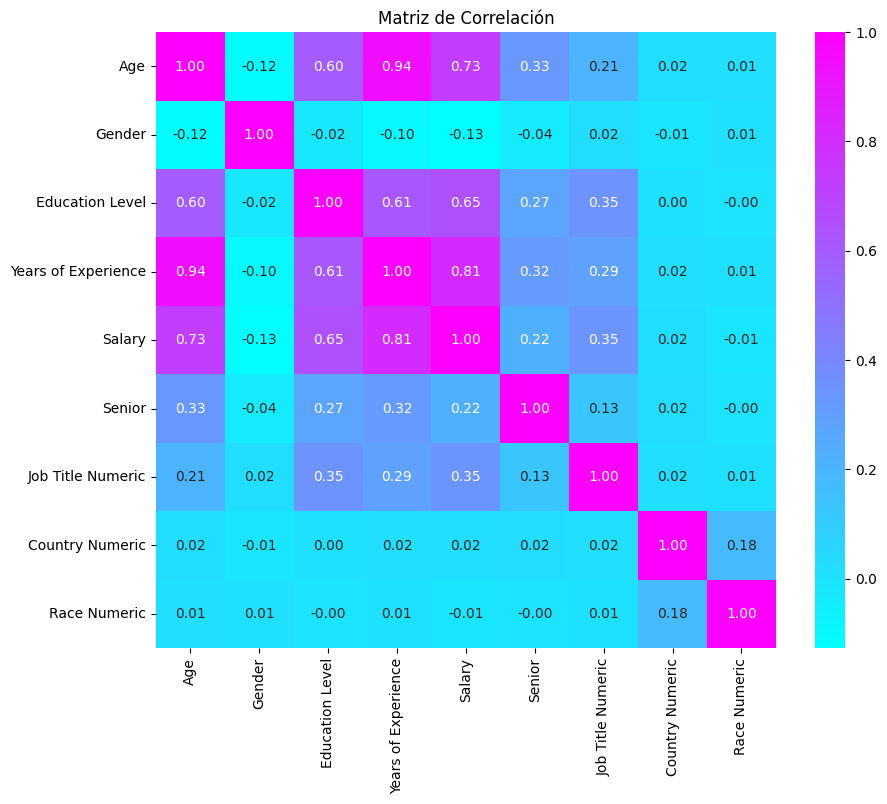

In [39]:
plt.figure(figsize=(10, 8))

# Mostrar el heatmap de la matriz de correlación
sns.heatmap(data_numeric.corr(), annot=True, cmap='cool', fmt='.2f')  # fmt='.2f' para redondear a 2 decimales
plt.title('Matriz de Correlación')
plt.show()


La variable con mayor correlación con 'salario' es 'Years of Experience' (0,81)
La segunda más alta con 'Salario' es 'Age' (0,73)
La correlación más alta de la matriz es entre 'Age' y 'Years of Experience': 94%


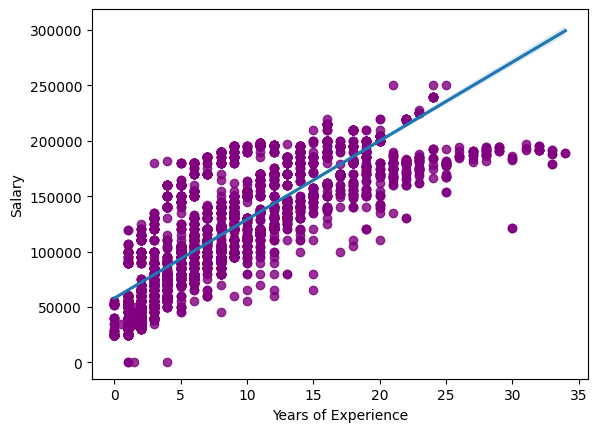

In [40]:
sns.regplot(data=data_numeric, x='Years of Experience', y='Salary', scatter_kws={'color': 'purple'})
plt.show()


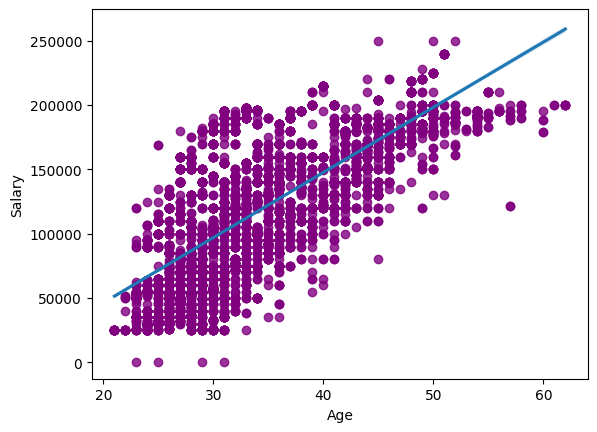

In [41]:
sns.regplot(data=data_numeric, x='Age', y='Salary', scatter_kws={'color': 'purple'})
plt.show()

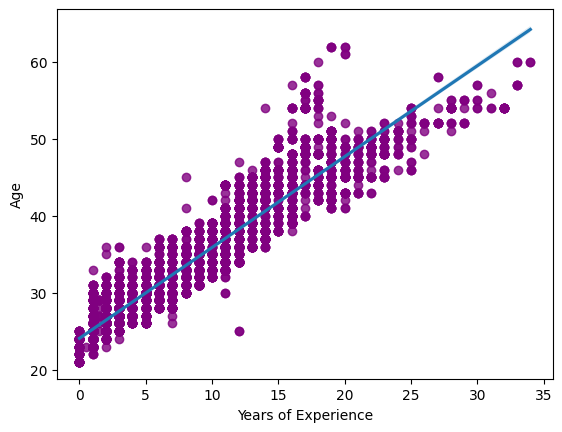

In [42]:
sns.regplot(data=data_numeric, x='Years of Experience', y='Age', scatter_kws={'color': 'purple'})
plt.show()

In [43]:
# Nos quedamos con la variable que más corr tiene con salario (Years of Experience) y quitamos la otra? (Age)

In [44]:
# Corr muy baja entre Salary con Contry y Race, quitar?

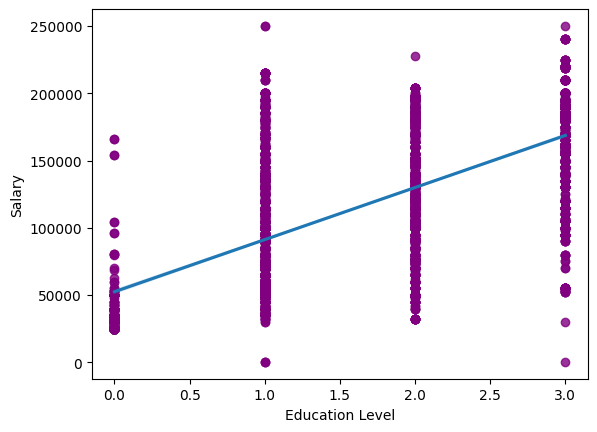

In [45]:
sns.regplot(data=data_numeric, x='Education Level', y='Salary', scatter_kws={'color': 'purple'})
plt.show()

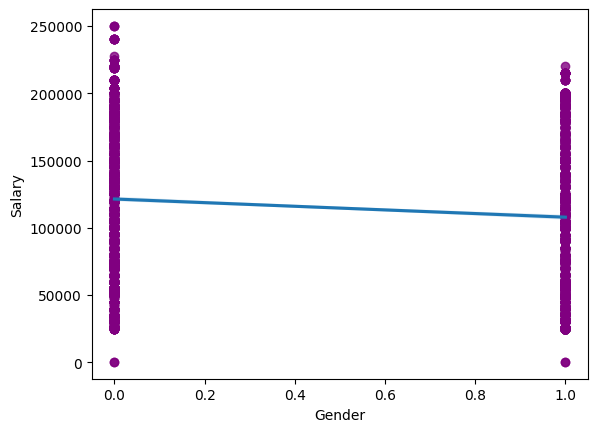

In [46]:
sns.regplot(data=data_numeric, x='Gender', y='Salary', scatter_kws={'color': 'purple'})
plt.show()

# **MODELOS**

### Dividir en train1 y test1

In [11]:
# Dividir en train1 y test1 para trabajar solo con el conjunto de entrenamiento train1, y mantener el conjunto de prueba test1
    # sin cambios hasta el final del proceso de aprendizaje automático

X = data_numeric[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]
y = data_numeric["Salary"] # target 

# Dividir TODOS los datos en train y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Guardar el conjunto de prueba test1 en un archivo CSV
ruta_test1_csv = r'C:\Users\bego_\Desktop\ML_project\src\data\test1.csv'
X_test1.to_csv(ruta_test1_csv, index=False)

In [13]:
print("Train2 features shape:", X_train1.shape)
print("Test2 features shape:", X_test1.shape)
print("Train2 target shape:", y_train1.shape)
print("Test2 target shape:", y_test1.shape)

Train2 features shape: (5347, 8)
Test2 features shape: (1337, 8)
Train2 target shape: (5347,)
Test2 target shape: (1337,)


### Dejar test1 sin usar hasta el final
Dividir train1 en train2 y test2 antes de entrenar el modelo y luego evaluar ese modelo inicial en test2

# 1. Regresión lineal

In [18]:
data_numeric.columns.tolist()

['Age',
 'Gender',
 'Education Level',
 'Years of Experience',
 'Salary',
 'Senior',
 'Job Title Numeric',
 'Country Numeric',
 'Race Numeric']

#### Dividir datos

In [19]:
X = data_numeric[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]
y = data_numeric["Salary"] # target 

In [20]:
# Dividir train1 en train2 y test2:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [21]:
print("Train2 features shape:", X_train2.shape)
print("Test2 features shape:", X_test2.shape)
print("Train2 target shape:", y_train2.shape)
print("Test2 target shape:", y_test2.shape)

Train2 features shape: (4277, 8)
Test2 features shape: (1070, 8)
Train2 target shape: (4277,)
Test2 target shape: (1070,)


#### Train (2)

In [22]:
lrmodel = LinearRegression()
lrmodel.fit(X_train2, y_train2)

LinearRegression()

Pred

In [23]:
# Realiza predicciones en el conjunto de prueba test 2
predictions_t2 = lrmodel.predict(X_test2)
predictions_t2

array([ 89781.17886775, 171460.60975201, 126641.33226379, ...,
        92373.38328293,  56254.64862405,  72334.89753523])

Evaluar modelo

In [24]:
# Rendimiento del modelo
mse = mean_squared_error(y_test2, predictions_t2)
r2 = r2_score(y_test2, predictions_t2)
mae = mean_absolute_error(y_test2, predictions_t2)
pearson_corr, _ = pearsonr(y_test2, predictions_t2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Pearson Correlation: {pearson_corr}")

Mean Squared Error: 787591757.0521139
R-squared: 0.7190153126225751
Mean Absolute Error: 22020.787382514092
Pearson Correlation: 0.8480096734516716


## 1.1 Regresión lineal con escalado

In [25]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Dividir los datos escalados en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Inicializar y entrenar el modelo de regresión lineal con datos escalados
model_scaled = LinearRegression()
model_scaled.fit(X_train2, y_train2)

LinearRegression()

In [28]:
# Realizar predicciones en el conjunto de prueba
predictions_scaled = model_scaled.predict(X_test2)

In [29]:
# Rendimiento del modelo
mse_scaled = mean_squared_error(y_test2, predictions_scaled)
r2_scaled = r2_score(y_test2, predictions_scaled)
mae_scaled = mean_absolute_error(y_test2, predictions_scaled)
pearson_corr_scaled, _ = pearsonr(y_test2, predictions_scaled)

print(f"Mean Squared Error (escalado): {mse_scaled}")
print(f"R-squared (escalado): {r2_scaled}")
print(f"Mean Absolute Error: {mae_scaled}")
print(f"Pearson Correlation: {pearson_corr_scaled}")


Mean Squared Error (escalado): 780284620.3841485
R-squared (escalado): 0.7222093018088747
Mean Absolute Error: 21703.992813503264
Pearson Correlation: 0.8498917175607351


LR mejora con escalado.

- Mean Squared Error (MSE) grande: discrepancia considerable entre las predicciones y los valores reales.

- R-squared (R²): explica un 0,72 de variabilidad. 

- Mean Absolute Error (MAE): promedio de los errores en las predicciones; error de 21592.15 unidades en promedio.

- Correlación de Pearson: alta, relación fuerte y lineal entre las predicciones del modelo y los valores reales.

El modelo explica una buena parte de la variabilidad de los datos y tiene una fuerte relación con los valores reales, pero tiene un error promedio alto,  las predicciones aún tienen errores considerables.

### Prueba de LR sin la variable 'Age': peor resultado

In [30]:
# Eliminar la columna correspondiente a 'Age' (1º columna)
X_scaled_no_age = X_scaled[:, 1:]

In [31]:
# Dividir los datos escalados sin 'Age' en conjuntos de entrenamiento y prueba
X_train_no_age, X_test_no_age, y_train, y_test = train_test_split(X_scaled_no_age, y, test_size=0.2, random_state=42)

In [32]:
# Inicializar y entrenar el modelo de regresión lineal con datos escalados sin 'Age'
model_no_age = LinearRegression()
model_no_age.fit(X_train_no_age, y_train)

LinearRegression()

In [33]:
# Realizar predicciones en el conjunto de prueba sin 'Age'
predictions_no_age = model_no_age.predict(X_test_no_age)

In [34]:
# Rendimiento del modelo sin 'Age'
mse_no_age = mean_squared_error(y_test, predictions_no_age)
r2_no_age = r2_score(y_test, predictions_no_age)
mae_no_age = mean_absolute_error(y_test, predictions_no_age)
pearson_corr_no_age, _ = pearsonr(y_test, predictions_no_age)

print(f"Mean Squared Error (sin 'Age'): {mse_no_age}")
print(f"R-squared (sin 'Age'): {r2_no_age}")
print(f"Mean Absolute Error (sin 'Age'): {mae_no_age}")
print(f"Pearson Correlation (sin 'Age'): {pearson_corr_no_age}")


Mean Squared Error (sin 'Age'): 799851188.0526774
R-squared (sin 'Age'): 0.7152433686713375
Mean Absolute Error (sin 'Age'): 21846.054898155213
Pearson Correlation (sin 'Age'): 0.8457921588277731


#### Ridge

In [35]:
# Inicializar el modelo de Ridge Regression
ridge_model = Ridge(alpha=1.0)

In [36]:
# Entrenar el modelo con datos escalados
ridge_model.fit(X_train2, y_train2)

Ridge()

In [37]:
# Realizar predicciones en el conjunto de prueba
predictions_ridge = ridge_model.predict(X_test2)

In [38]:
# Rendimiento del modelo
mse_ridge = mean_squared_error(y_test2, predictions_ridge)
r2_ridge = r2_score(y_test2, predictions_ridge)
mae_ridge = mean_absolute_error(y_test2, predictions_ridge)
pearson_corr_ridge, _ = pearsonr(y_test2, predictions_ridge)

print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")
print(f"R-squared (Ridge Regression): {r2_ridge}")
print(f"Mean Absolute Error (Ridge Regression): {mae_ridge}")
print(f"Pearson Correlation (Ridge Regression): {pearson_corr_ridge}")


Mean Squared Error (Ridge Regression): 780274995.8374027
R-squared (Ridge Regression): 0.7222127282631331
Mean Absolute Error (Ridge Regression): 21704.910567026905
Pearson Correlation (Ridge Regression): 0.849895652692559


Prácticamente igual al LR escalado, un poco peor

#### Lasso

In [39]:
# Inicializar el modelo de Lasso Regression
lasso_model = Lasso(alpha=1.0) # hiperpar

# Entrenar el modelo con datos escalados
lasso_model.fit(X_train2, y_train2)

# Realizar predicciones en el conjunto de prueba
predictions_lasso = lasso_model.predict(X_test2)

In [40]:
# Rendimiento del modelo
mse_lasso = mean_squared_error(y_test2, predictions_lasso)
r2_lasso = r2_score(y_test2, predictions_lasso)
mae_lasso = mean_absolute_error(y_test2, predictions_lasso)
pearson_corr_lasso, _ = pearsonr(y_test2, predictions_lasso)

print(f"Mean Squared Error (Lasso Regression): {mse_lasso}")
print(f"R-squared (Lasso Regression): {r2_lasso}")
print(f"Mean Absolute Error (Lasso Regression): {mae_lasso}")
print(f"Pearson Correlation (Lasso Regression): {pearson_corr_lasso}")


Mean Squared Error (Lasso Regression): 780284024.0139271
R-squared (Lasso Regression): 0.7222095141238375
Mean Absolute Error (Lasso Regression): 21704.24909282661
Pearson Correlation (Lasso Regression): 0.8498921825269409


El rendimiento del modelo Lasso Regression es similar al rendimiento del modelo de regresión lineal y al modelo Ridge Regression.

# 2. Random Forest   ***

In [12]:
X = data_numeric[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]
y = data_numeric["Salary"] # target 

# Dividir train1 en train2 y test2:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [13]:
# Crear el modelo de Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
# Entrenar el modelo con los datos escalados
random_forest.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

In [15]:
# Realizar predicciones en el conjunto de prueba
predictions_rf = random_forest.predict(X_test2)

In [16]:
# Rendimiento del modelo
mse_rf = mean_squared_error(y_test2, predictions_rf)
r2_rf = r2_score(y_test2, predictions_rf)
mae_rf = mean_absolute_error(y_test2, predictions_rf)
pearson_corr_rf, _ = pearsonr(y_test2, predictions_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")
print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"Pearson Correlation (Random Forest): {pearson_corr_rf}")


Mean Squared Error (Random Forest): 81240428.136985
R-squared (Random Forest): 0.9710163087690005
Mean Absolute Error (Random Forest): 4169.5950028590305
Pearson Correlation (Random Forest): 0.9854150714833849


Mejora. MSE relativamente bajo y un R-cuadrado alto en el modelo Random Forest sugieren que este modelo está haciendo predicciones muy precisas y explica gran parte de la variabilidad en los salarios de acuerdo con las características proporcionadas.

# 3. Gradient Boosting R

In [77]:
# Inicializar y entrenar el modelo de Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train2, y_train2)

GradientBoostingRegressor(random_state=42)

In [78]:
# Realizar predicciones en el conjunto de prueba
predictions = gradient_boosting.predict(X_test2)

In [79]:
# Rendimiento del modelo
mse = mean_squared_error(y_test2, predictions)
r2 = r2_score(y_test2, predictions)
mae = mean_absolute_error(y_test2, predictions)
pearson_corr, _ = pearsonr(y_test2, predictions)

print(f"Mean Squared Error (Gradient Boosting): {mse}")
print(f"R-squared (Gradient Boosting): {r2}")
print(f"Mean Absolute Error (Gradient Boosting): {mae}")
print(f"Pearson Correlation (Gradient Boosting): {pearson_corr}")

Mean Squared Error (Gradient Boosting): 266035461.15430936
R-squared (Gradient Boosting): 0.9050880228056952
Mean Absolute Error (Gradient Boosting): 12138.13217635139
Pearson Correlation (Gradient Boosting): 0.9515494561889407


El valor MSE no es tan bajo como en el Random Forest, pero sigue siendo mejor que el modelo de regresión lineal inicial.

En cuanto a R², el modelo de Gradient Boosting se ajusta bien a los datos y tiene una capacidad decente para predecir los salarios basados en las características proporcionadas.

El MAE es de aproximadamente 12257.04 unidades. Esto indica que, en promedio, las predicciones tienen un error absoluto medio de esa magnitud.

La correlación de Pearson es alta, alrededor de 0.95, lo que indica una relación muy fuerte y positiva entre las predicciones del modelo y los valores reales.

# 4. AdaBoost R

algoritmo de ensamblaje que se basa en la idea de crear múltiples modelos débiles y combinar sus predicciones para obtener un modelo más fuerte. Es una técnica iterativa donde se asigna un peso a cada instancia en los datos y se ajusta un modelo en función de esos pesos

In [80]:
# Crear el modelo AdaBoostRegressor
ada_boost = AdaBoostRegressor(random_state=42)

In [81]:
# Entrenar el modelo con los datos de entrenamiento escalados (X_train2, y_train2)
ada_boost.fit(X_train2, y_train2)

AdaBoostRegressor(random_state=42)

In [82]:
# Realizar predicciones en el conjunto de prueba
predictions_ada = ada_boost.predict(X_test2)

In [83]:
# Rendimiento del modelo
mse_ada = mean_squared_error(y_test2, predictions_ada)
r2_ada = r2_score(y_test2, predictions_ada)
mae_ada = mean_absolute_error(y_test2, predictions_ada)
pearson_corr_ada, _ = pearsonr(y_test2, predictions_ada)

print(f"Mean Squared Error (AdaBoost): {mse_ada}")
print(f"R-squared (AdaBoost): {r2_ada}")
print(f"Mean Absolute Error (AdaBoost): {mae_ada}")
print(f"Pearson Correlation (AdaBoost): {pearson_corr_ada}")



Mean Squared Error (AdaBoost): 645395059.5519611
R-squared (AdaBoost): 0.7697460296919502
Mean Absolute Error (AdaBoost): 21515.732004706995
Pearson Correlation (AdaBoost): 0.8846248768661366


MSE grande pero tiene un R² decente, un MAE moderado y una correlación de Pearson alta. Explica una parte significativa de la variabilidad de los datos pero las predicciones tienen errores considerables

# 5. Decision Tree

In [84]:
# Inicializar y entrenar el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [85]:
# Realizar predicciones en el conjunto de prueba
predictions = decision_tree.predict(X_test2)

In [86]:
# Rendimiento del modelo
mse = mean_squared_error(y_test2, predictions)
r2 = r2_score(y_test2, predictions)
mae = mean_absolute_error(y_test2, predictions)
pearson_corr, _ = pearsonr(y_test2, predictions)

print(f"Mean Squared Error (Decision Tree): {mse}")
print(f"R-squared (Decision Tree): {r2}")
print(f"Mean Absolute Error (Decision Tree): {mae}")
print(f"Pearson Correlation (Decision Tree): {pearson_corr}")



Mean Squared Error (Decision Tree): 120489985.86656281
R-squared (Decision Tree): 0.957013464516762
Mean Absolute Error (Decision Tree): 3956.627725856698
Pearson Correlation (Decision Tree): 0.978819113088485


El modelo de Árbol de Decisión parece tener un rendimiento bastante bueno en comparación con otros modelos (Random forest sigue sie3ndo el mejor). Tiene un MSE menor, un R² alto, un MAE bajo y una alta correlación de Pearson, lo que sugiere que es capaz de explicar y predecir los datos con bastante precisión.

# 6. SVR (Support Vector Regression) 

In [87]:
# Inicializar y entrenar el modelo SVR
svr = SVR(kernel='rbf')  # El kernel 'rbf' es comúnmente utilizado
svr.fit(X_train2, y_train2)

SVR()

In [88]:
# Realizar predicciones en el conjunto de prueba
predictions_svr = svr.predict(X_test2)

In [89]:
# Evaluar el rendimiento del modelo
mse_svr = mean_squared_error(y_test2, predictions_svr)
r2_svr = r2_score(y_test2, predictions_svr)
mae_svr = mean_absolute_error(y_test2, predictions_svr)
pearson_corr_svr, _ = pearsonr(y_test2, predictions_svr)

# Imprimir los resultados
print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")
print(f"Mean Absolute Error (SVR): {mae_svr}")
print(f"Pearson Correlation (SVR): {pearson_corr_svr}")


Mean Squared Error (SVR): 2786889390.5981927
R-squared (SVR): 0.005737125660546627
Mean Absolute Error (SVR): 46204.70908807668
Pearson Correlation (SVR): 0.6089413419313704


Aunque la correlación de Pearson es relativamente alta (0.784) (fuerte relación lineal entre las predicciones y los valores reales), el MSE y el R² sugieren un rendimiento deficiente del modelo en términos de predicción de salarios. El modelo no se ajusta bien a los datos y tiene dificultades para hacer predicciones precisas.

In [90]:
# Hiperparámetros a explorar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Inicializar el modelo SVR
svr = SVR()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train2, y_train2)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


In [ ]:
# Inicializar y entrenar el modelo SVR con los hiperparámetros específicos
svr = SVR(kernel='linear', C=100, gamma='scale')
svr.fit(X_train2, y_train2)

# Realizar predicciones en el conjunto de prueba
predictions_svr = svr.predict(X_test2)

# Evaluar el rendimiento del modelo
mse_svr = mean_squared_error(y_test2, predictions_svr)
r2_svr = r2_score(y_test2, predictions_svr)
mae_svr = mean_absolute_error(y_test2, predictions_svr)
pearson_corr_svr, _ = pearsonr(y_test2, predictions_svr)

# Imprimir los resultados
print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")
print(f"Mean Absolute Error (SVR): {mae_svr}")
print(f"Pearson Correlation (SVR): {pearson_corr_svr}")


NameError: name 'SVR' is not defined

# 7. XGBR ***

XGBoostRegressor es útil en problemas de regresión, donde se busca predecir valores numéricos continuos. Este algoritmo se destaca por varias razones:

Rendimiento y precisión: XGBoostRegressor suele ser altamente preciso debido a su capacidad para manejar datos complejos y grandes conjuntos de datos. Utiliza un método de ensemble, combinando múltiples modelos más débiles para mejorar la precisión general.

Regularización: Evita el sobreajuste mediante técnicas de regularización, lo que ayuda a reducir la complejidad del modelo y mejorar la generalización.

Manejo de características: Puede manejar automáticamente las características más relevantes, lo que significa que no siempre es necesario realizar una selección manual de características.

Velocidad de entrenamiento: A pesar de ser un modelo potente, puede entrenar y ajustarse rápidamente a los datos, lo que lo hace eficiente en términos de tiempo de procesamiento.

In [17]:
# Inicializar y entrenar el modelo XGBoost (XGBRegressor)
xgb = XGBRegressor()
xgb.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
# Realizar predicciones en el conjunto de prueba
predictions_xgb = xgb.predict(X_test2)

In [19]:
# Rendimiento del modelo
mse_xgb = mean_squared_error(y_test2, predictions_xgb)
r2_xgb = r2_score(y_test2, predictions_xgb)
mae_xgb = mean_absolute_error(y_test2, predictions_xgb)
pearson_corr_xgb, _ = pearsonr(y_test2, predictions_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"Pearson Correlation (XGBoost): {pearson_corr_xgb}")


Mean Squared Error (XGBoost): 72051784.08576588
R-squared (XGBoost): 0.9742944896959034
Mean Absolute Error (XGBoost): 4828.656434360397
Pearson Correlation (XGBoost): 0.9870840991570619


MSE y MAE bajos, un R² alto y una alta correlación de Pearson, capacidad bastante buena para predecir los salarios.

# Resumen modelos

In [ ]:
# Regresión Lineal con escalado
mse_scaled = mean_squared_error(y_test2, predictions_scaled)
r2_scaled = r2_score(y_test2, predictions_scaled)
mae_scaled = mean_absolute_error(y_test2, predictions_scaled)
pearson_corr_scaled, _ = pearsonr(y_test2, predictions_scaled)

print(f"Mean Squared Error (escalado): {mse_scaled}")
print(f"R-squared (escalado): {r2_scaled}")
print(f"Mean Absolute Error: {mae_scaled}")
print(f"Pearson Correlation: {pearson_corr_scaled}")

Mean Squared Error (escalado): 778799562.5232688
R-squared (escalado): 0.7227380002469201
Mean Absolute Error: 21592.148220030635
Pearson Correlation: 0.8501645651227482


In [ ]:
# Ridge
mse_ridge = mean_squared_error(y_test2, predictions_ridge)
r2_ridge = r2_score(y_test2, predictions_ridge)
mae_ridge = mean_absolute_error(y_test2, predictions_ridge)
pearson_corr_ridge, _ = pearsonr(y_test2, predictions_ridge)

print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")
print(f"R-squared (Ridge Regression): {r2_ridge}")
print(f"Mean Absolute Error (Ridge Regression): {mae_ridge}")
print(f"Pearson Correlation (Ridge Regression): {pearson_corr_ridge}")

Mean Squared Error (Ridge Regression): 778856568.8727932
R-squared (Ridge Regression): 0.7227177053016886
Mean Absolute Error (Ridge Regression): 21593.75358945577
Pearson Correlation (Ridge Regression): 0.8501532709478747


In [ ]:
# Lasso
mse_lasso = mean_squared_error(y_test2, predictions_lasso)
r2_lasso = r2_score(y_test2, predictions_lasso)
mae_lasso = mean_absolute_error(y_test2, predictions_lasso)
pearson_corr_lasso, _ = pearsonr(y_test2, predictions_lasso)

print(f"Mean Squared Error (Lasso Regression): {mse_lasso}")
print(f"R-squared (Lasso Regression): {r2_lasso}")
print(f"Mean Absolute Error (Lasso Regression): {mae_lasso}")
print(f"Pearson Correlation (Lasso Regression): {pearson_corr_lasso}")

Mean Squared Error (Lasso Regression): 778815194.2808684
R-squared (Lasso Regression): 0.7227324351534349
Mean Absolute Error (Lasso Regression): 21592.58236253575
Pearson Correlation (Lasso Regression): 0.8501613970876213


In [ ]:
# Gradient Boosting
mse = mean_squared_error(y_test2, predictions)
r2 = r2_score(y_test2, predictions)
mae = mean_absolute_error(y_test2, predictions)
pearson_corr, _ = pearsonr(y_test2, predictions)

print(f"Mean Squared Error (Gradient Boosting): {mse}")
print(f"R-squared (Gradient Boosting): {r2}")
print(f"Mean Absolute Error (Gradient Boosting): {mae}")
print(f"Pearson Correlation (Gradient Boosting): {pearson_corr}")

Mean Squared Error (Gradient Boosting): 127113682.98049116
R-squared (Gradient Boosting): 0.954746001878889
Mean Absolute Error (Gradient Boosting): 3737.054225878833
Pearson Correlation (Gradient Boosting): 0.9774598920989742


In [ ]:
# Ada Boost
mse_ada = mean_squared_error(y_test2, predictions_ada)
r2_ada = r2_score(y_test2, predictions_ada)
mae_ada = mean_absolute_error(y_test2, predictions_ada)
pearson_corr_ada, _ = pearsonr(y_test2, predictions_ada)

print(f"Mean Squared Error (AdaBoost): {mse_ada}")
print(f"R-squared (AdaBoost): {r2_ada}")
print(f"Mean Absolute Error (AdaBoost): {mae_ada}")
print(f"Pearson Correlation (AdaBoost): {pearson_corr_ada}")

Mean Squared Error (AdaBoost): 610441763.2856734
R-squared (AdaBoost): 0.7826753992092476
Mean Absolute Error (AdaBoost): 20830.092701426587
Pearson Correlation (AdaBoost): 0.895396836850755


In [ ]:
# Decision Tree
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
pearson_corr, _ = pearsonr(y_test, predictions)

print(f"Mean Squared Error (Decision Tree): {mse}")
print(f"R-squared (Decision Tree): {r2}")
print(f"Mean Absolute Error (Decision Tree): {mae}")
print(f"Pearson Correlation (Decision Tree): {pearson_corr}")

Mean Squared Error (Decision Tree): 124586749.1336533
R-squared (Decision Tree): 0.9556456206836917
Mean Absolute Error (Decision Tree): 3728.24470206931
Pearson Correlation (Decision Tree): 0.9778734754954909


In [ ]:
# SVR
mse_svr = mean_squared_error(y_test2, predictions_svr)
r2_svr = r2_score(y_test2, predictions_svr)
mae_svr = mean_absolute_error(y_test2, predictions_svr)
pearson_corr_svr, _ = pearsonr(y_test2, predictions_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")
print(f"Mean Absolute Error (SVR): {mae_svr}")
print(f"Pearson Correlation (SVR): {pearson_corr_svr}")

Mean Squared Error (SVR): 2783803254.96681
R-squared (SVR): 0.008932600205242558
Mean Absolute Error (SVR): 45678.020598916206
Pearson Correlation (SVR): 0.7841433802662312


El mejor modelo está entre XGBR y Random Forest

In [ ]:
# Random Forest     ***
mse_rf = mean_squared_error(y_test2, predictions_rf)
r2_rf = r2_score(y_test2, predictions_rf)
mae_rf = mean_absolute_error(y_test2, predictions_rf)
pearson_corr_rf, _ = pearsonr(y_test2, predictions_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")
print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"Pearson Correlation (Random Forest): {pearson_corr_rf}")

Mean Squared Error (Random Forest): 77095068.5208074
R-squared (Random Forest): 0.9725532294857432
Mean Absolute Error (Random Forest): 3743.4108483622585
Pearson Correlation (Random Forest): 0.9861824525886338


In [ ]:
# XGBR
mse_xgb = mean_squared_error(y_test2, predictions_xgb)
r2_xgb = r2_score(y_test2, predictions_xgb)
mae_xgb = mean_absolute_error(y_test2, predictions_xgb)
pearson_corr_xgb, _ = pearsonr(y_test2, predictions_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"Pearson Correlation (XGBoost): {pearson_corr_xgb}")

Mean Squared Error (XGBoost): 78189576.58417885
R-squared (XGBoost): 0.9721635714671728
Mean Absolute Error (XGBoost): 4647.089303792013
Pearson Correlation (XGBoost): 0.9859921564707214
